# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [66]:
# Use this cell for your code
import pandas as pd
titanic_data = pd.read_csv('Titanic_data_as_csv.csv')
print(titanic_data.shape)


(891, 12)


2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [67]:
# Use this cell for your code
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
print(titanic_data.shape)


(891, 9)


3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [68]:
# Use this cell for your code
titanic_data['Deck'] = titanic_data['Cabin'].str[0]
titanic_data = titanic_data.drop('Cabin', axis=1)
print(sorted(titanic_data['Deck'].dropna().unique()))


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']


4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [69]:
# Use this cell for your code
titanic_data['Sex_encoded'], sex_labels = pd.factorize(titanic_data['Sex'])
titanic_data['Embarked_encoded'], embarked_labels = pd.factorize(titanic_data['Embarked'])
titanic_data['Deck_encoded'], deck_labels = pd.factorize(titanic_data['Deck'])


titanic_data = titanic_data.drop(['Sex', 'Embarked', 'Deck'], axis=1)

print("Sex labels:", sex_labels.tolist())
print("Embarked labels:", embarked_labels.tolist())
print("Deck labels:", deck_labels.tolist())
print("Current columns:", titanic_data.columns.tolist())


Sex labels: ['male', 'female']
Embarked labels: ['S', 'C', 'Q']
Deck labels: ['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']
Current columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_encoded', 'Deck_encoded']


5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [70]:
# Use this cell for your code



continuous_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in continuous_cols:
    if col in titanic_data.columns and titanic_data[col].isnull().sum() > 0:
        mean_val = titanic_data[col].mean()
        titanic_data[col] = titanic_data[col].fillna(mean_val)
       

categorical_cols = ['Sex_encoded', 'Embarked_encoded', 'Deck_encoded', 'Pclass','Embarked ']
for col in categorical_cols:
    if col in titanic_data.columns and titanic_data[col].isnull().sum() > 0:
        mode_val = titanic_data[col].mode()[0] 
        titanic_data[col] = titanic_data[col].fillna(mode_val)
        
print(titanic_data.isnull().sum())


Survived            0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
Sex_encoded         0
Embarked_encoded    0
Deck_encoded        0
dtype: int64


6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [71]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [72]:
# Use this cell for your code
import json
titanic_data.to_csv('titanic_processed.csv', index=False)
titanic_data.to_json('titanic_processed.json', orient='records', indent=2)

with open('titanic_processed.json', 'r') as f:
    data = json.load(f)

print(json.dumps(data[:1], indent=1))



[
 {
  "Survived": 0,
  "Pclass": 3,
  "Age": 22.0,
  "SibSp": 1,
  "Parch": 0,
  "Fare": 7.25,
  "Sex_encoded": 0,
  "Embarked_encoded": 0,
  "Deck_encoded": -1
 }
]


Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [73]:
# Use this cell for your code
categorical_vars = ['Pclass', 'SibSp', 'Parch', 'Sex_encoded', 'Embarked_encoded', 'Deck_encoded', 'Survived']
numerical_vars = ['Age', 'Fare']


print(titanic_data[categorical_vars].describe())


for var in numerical_vars:
    if var in titanic_data.columns:
        print(var,titanic_data[var].median())




           Pclass       SibSp       Parch  Sex_encoded  Embarked_encoded  \
count  891.000000  891.000000  891.000000   891.000000        891.000000   
mean     2.308642    0.523008    0.381594     0.352413          0.359147   
std      0.836071    1.102743    0.806057     0.477990          0.638707   
min      1.000000    0.000000    0.000000     0.000000         -1.000000   
25%      2.000000    0.000000    0.000000     0.000000          0.000000   
50%      3.000000    0.000000    0.000000     0.000000          0.000000   
75%      3.000000    1.000000    0.000000     1.000000          1.000000   
max      3.000000    8.000000    6.000000     1.000000          2.000000   

       Deck_encoded    Survived  
count    891.000000  891.000000  
mean      -0.188552    0.383838  
std        1.815143    0.486592  
min       -1.000000    0.000000  
25%       -1.000000    0.000000  
50%       -1.000000    0.000000  
75%       -1.000000    1.000000  
max        7.000000    1.000000  
Age 29.69

2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [74]:
# Use this cell for your code

survivors = titanic_data[titanic_data['Survived'] == 1]
non_survivors = titanic_data[titanic_data['Survived'] == 0]


average_survivor = {
    'Pclass': survivors['Pclass'].mode().iloc[0],
    'SibSp': survivors['SibSp'].mode().iloc[0],
    'Parch': survivors['Parch'].mode().iloc[0],
    'Sex_encoded': survivors['Sex_encoded'].mode().iloc[0],
    'Embarked_encoded': survivors['Embarked_encoded'].mode().iloc[0],
    'Deck_encoded': survivors['Deck_encoded'].mode().iloc[0],
    'Age': survivors['Age'].median(),
    'Fare': survivors['Fare'].median()
}

average_non_survivor = {
    'Pclass': non_survivors['Pclass'].mode().iloc[0],
    'SibSp': non_survivors['SibSp'].mode().iloc[0],
    'Parch': non_survivors['Parch'].mode().iloc[0],
    'Sex_encoded': non_survivors['Sex_encoded'].mode().iloc[0],
    'Embarked_encoded': non_survivors['Embarked_encoded'].mode().iloc[0],
    'Deck_encoded': non_survivors['Deck_encoded'].mode().iloc[0],
    'Age': non_survivors['Age'].median(),
    'Fare': non_survivors['Fare'].median()
}

for key, value in average_survivor.items():
    print(key,value)
for key, value in average_non_survivor.items():
    print(key,value)

Pclass 1
SibSp 0
Parch 0
Sex_encoded 1
Embarked_encoded 0
Deck_encoded -1
Age 29.69911764705882
Fare 26.0
Pclass 3
SibSp 0
Parch 0
Sex_encoded 0
Embarked_encoded 0
Deck_encoded -1
Age 29.69911764705882
Fare 10.5


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

In [75]:
# Use this cell for your code
grouped = titanic_data.groupby('Survived')

survivors = grouped.get_group(1)   
non_survivors = grouped.get_group(0)

print("Survivors", len(grouped.get_group(1)))
print("Non-survivors", len(grouped.get_group(0)))


print(grouped['Age'].mean())
print(grouped['Fare'].mean())

Survivors 342
Non-survivors 549
Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

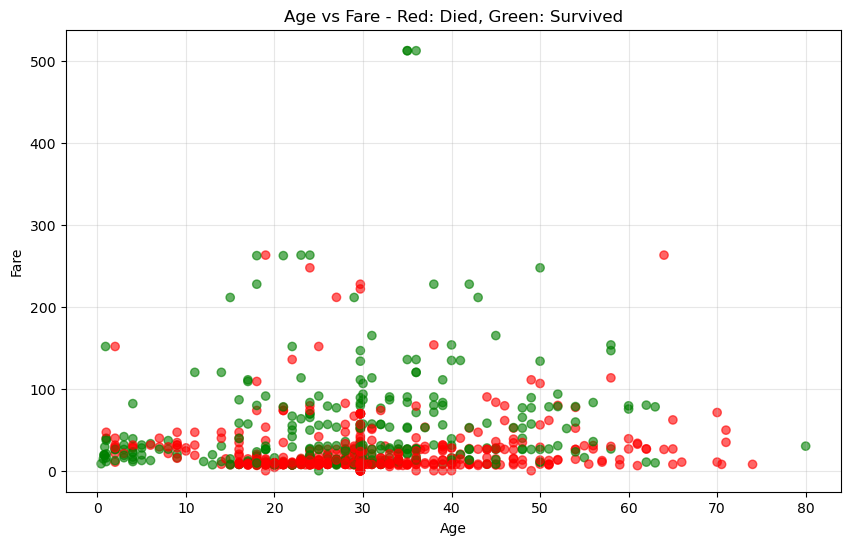

In [76]:
# Use this cell for your code
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(titanic_data['Age'], titanic_data['Fare'], 
            c=titanic_data['Survived'].map({0: 'red', 1: 'green'}), 
            alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare - Red: Died, Green: Survived')
plt.grid(True, alpha=0.3)
plt.show()

5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

*Use this (markdown) cell for your written answer*

*We kept all 891 passengers instead of losing valuable data points, we kept tatistical power remained strong for analysis and modeling, and also averages (mean/mode) represent typical values, maintaining the overall distribution.*

*Imputation with averages can slightly underestimate the true variability in the data*

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [77]:
# Use this cell for your code
from collections import Counter


with open('pos.txt', 'r') as f:
    positive_text = f.read().lower()

with open('neg.txt', 'r') as f:
    negative_text = f.read().lower()

positive_words = positive_text.lower().split()
negative_words = negative_text.lower().split()


positive_counts = Counter(positive_words)
negative_counts = Counter(negative_words)



for word, count in positive_counts.most_common(5):
    print(word,count)


for word, count in negative_counts.most_common(5):
    print(word,count)


great 435906
work 427780
use 345233
good 291448
fit 273505
work 39998
use 37244
fit 31293
product 24394
just 23580


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [ ]:
# Use this cell for your code

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([positive_text, negative_text])


words = vectorizer.get_feature_names_out()
scores = tfidf_matrix.toarray()


positive_scores = list(scores[0])
top_positive = sorted(zip(words, positive_scores), key=lambda x: x[1], reverse=True)[:5]
for word, score in top_positive:
    if score > 0:
        print(word,score)

 
negative_scores = list(scores[1])
top_negative = sorted(zip(words, negative_scores), key=lambda x: x[1], reverse=True)[:5]
for word, score in top_negative:
    if score > 0:
        print(word,score)

great 0.366786366750411
work 0.3599488696381578
use 0.2904909722562769
good 0.2452344152562107
fit 0.23013655521619605
instal 0.19303181608759293
product 0.17677193494100413
look 0.15263706788824036
just 0.15181162059964567
like 0.1478610854111115
work 0.30180257429226065
use 0.2810224280449261
fit 0.23611950490843822
product 0.18406350310729053
just 0.1779215136209687
light 0.17284343140439057
like 0.15607746010389048
time 0.14838110964191473
look 0.14203539323159944
instal 0.14116766744421982


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [83]:
# Use this cell for your code
'Common words'
print("Positive:", [word for word, count in positive_counts.most_common(10)])
print("Positive-TF-IDF:", [word for word, score in top_positive[:10]])

print("Negative:", [word for word, count in negative_counts.most_common(10)])
print("Negative-TF-IDF:", [word for word, score in top_negative[:10]])


Positive: ['great', 'work', 'use', 'good', 'fit', 'instal', 'product', 'look', 'just', 'like']
Positive-TF-IDF: ['great', 'work', 'use', 'good', 'fit', 'instal', 'product', 'look', 'just', 'like']
Negative: ['work', 'use', 'fit', 'product', 'just', 'light', 'like', 'time', 'look', 'instal']
Negative-TF-IDF: ['work', 'use', 'fit', 'product', 'just', 'light', 'like', 'time', 'look', 'instal']


4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

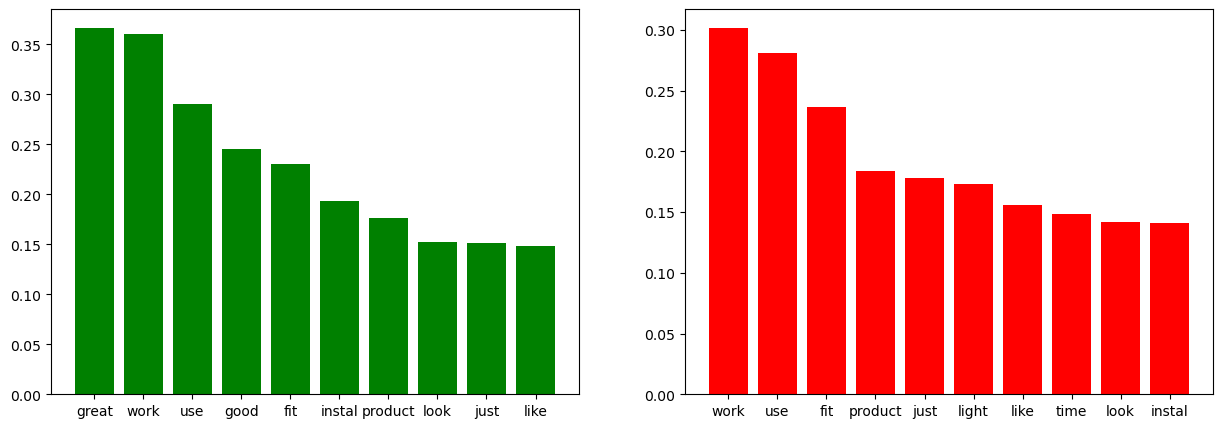

In [87]:


top_positive = sorted(zip(words, scores[0]), key=lambda x: x[1], reverse=True)[:10]
top_negative = sorted(zip(words, scores[1]), key=lambda x: x[1], reverse=True)[:10]


plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.bar([word for word, score in top_positive], 
        [score for word, score in top_positive], 
        color='green')



plt.subplot(1, 2, 2)
plt.bar([word for word, score in top_negative], 
        [score for word, score in top_negative],
        color='red')
plt.show()

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



**Submit a PDF with all the charts (the ones you found and the ones you produced).**